# Task - 2 Unemployment analysis In India using Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import datetime as dt

import calendar

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Unemployment in India Dataset.csv")

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Basic Understanding Of Data

In [4]:
df.shape

(768, 7)

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

As you can see there is space in starting of some features so we have to remove it

In [7]:
# Changing name of features
df.rename(columns={'Region':'States',' Date':"Date"," Frequency":"Frequency"," Estimated Unemployment Rate (%)":"Estimated Unemployment Rate (%)"," Estimated Employed":"Estimated Employed"," Estimated Labour Participation Rate (%)":"Estimated Labour Participation Rate (%)"},inplace=True)

In [8]:
df

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Removing Null Values
df.dropna(inplace=True)

In [10]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing values"})

,Total No. of Missing values
States,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   States                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [12]:
# Changing Datatype of Date
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [14]:
# extraction month and year from date feature
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Year']=pd.to_datetime(df['Date']).dt.year

In [15]:
df

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,2020


In [16]:
# Convert months in words so it become simple for analysis
df['Month_Name']=df['Month'].apply(lambda x: calendar.month_abbr[x])

In [17]:
df

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Month_Name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019,Sep
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,2020,Feb
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,2020,Mar
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,2020,Apr
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,2020,May


In [18]:
# round() used to roundoff the values
round(df.groupby(['States'])[["Estimated Unemployment Rate (%)","Estimated Employed",
"Estimated Labour Participation Rate (%)"]].mean()).sort_values(by='Estimated Unemployment Rate (%)')

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
States,,,
Meghalaya,5.0,689737.0,57.0
Assam,6.0,5354772.0,45.0
Odisha,6.0,6545747.0,39.0
Andhra Pradesh,7.0,8154093.0,39.0
Sikkim,7.0,106881.0,46.0
Gujarat,7.0,11402013.0,46.0
Madhya Pradesh,7.0,11115484.0,39.0
Uttarakhand,7.0,1390228.0,34.0
Karnataka,7.0,10667119.0,41.0


Insights

Lowest average unemployement rate is in Meghalaya with 5%.

Highest average unemployement rate is in Tripura with 28%.

# Exploratory Data Analysis

In [19]:
df.head(5)

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Month_Name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019,Sep


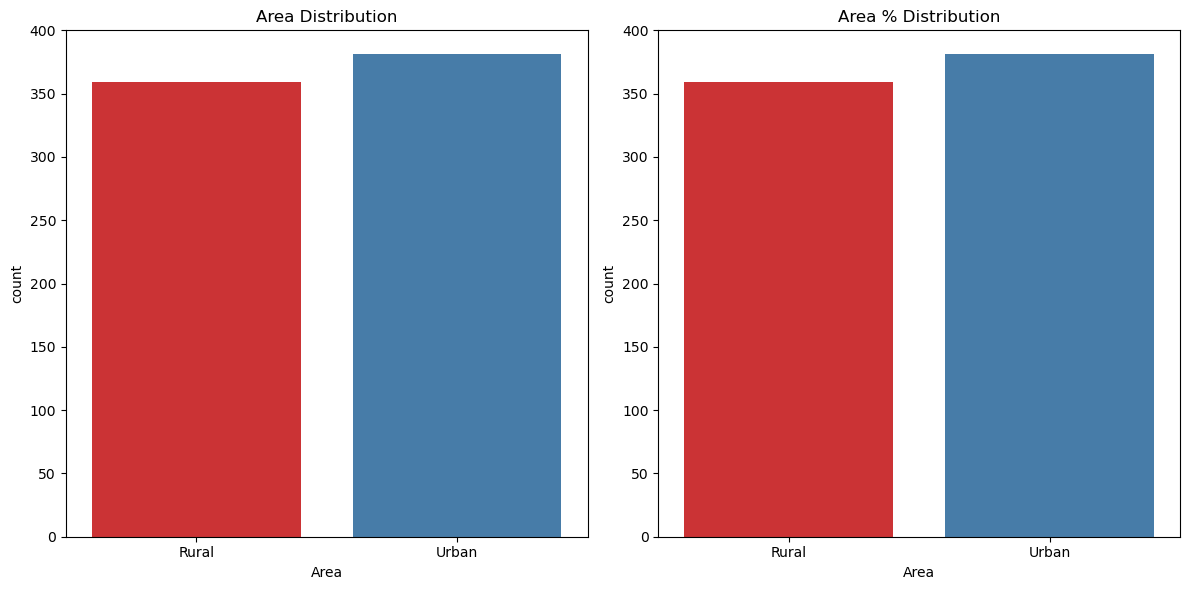

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.title("Area Distribution")
sns.countplot(x='Area', data=df, palette='Set1')

plt.subplot(1,2,2)
plt.title("Area % Distribution")
sns.countplot(x='Area', data=df, palette='Set1')

plt.tight_layout()
plt.show()


Insights:

states include 381 urban areas & 359 rural areas.

approx 51% are rural area and 49% are urban area.

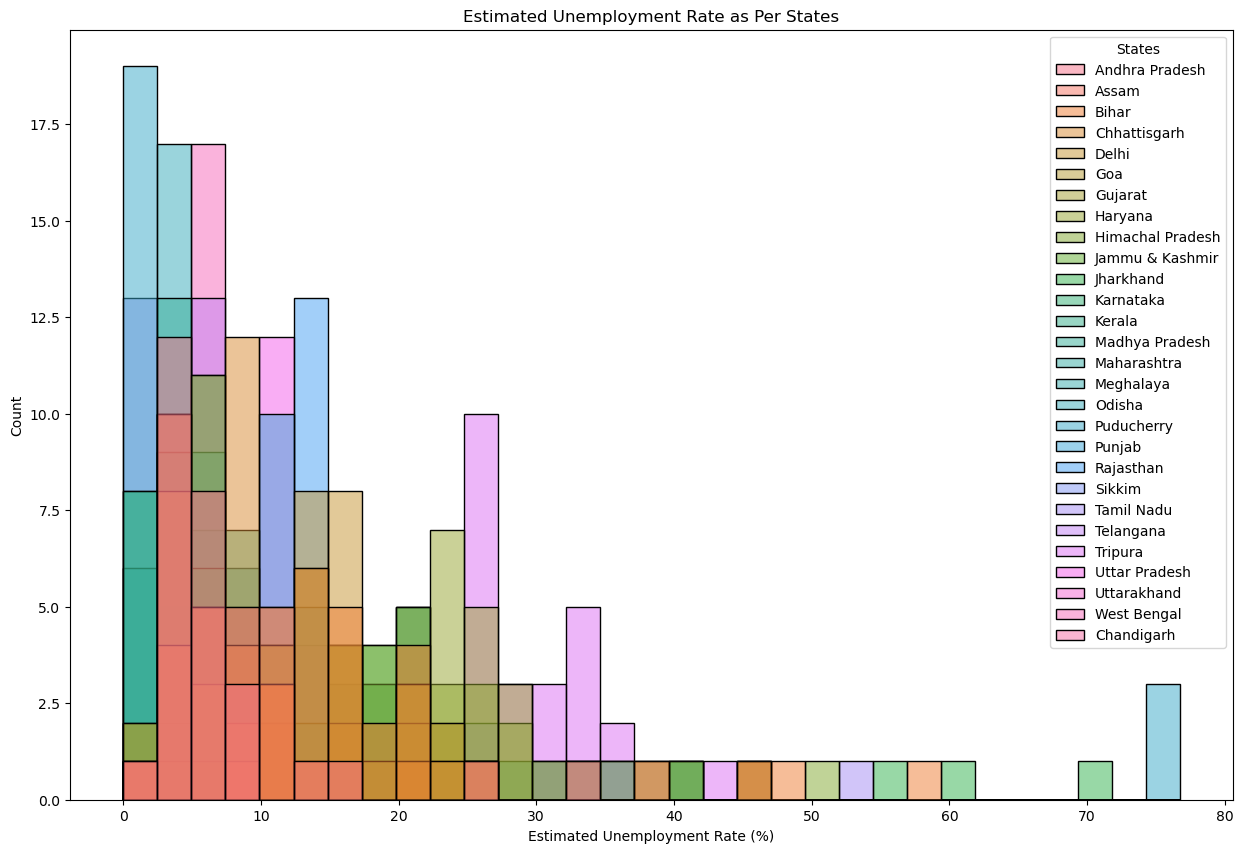

In [29]:
plt.figure(figsize=(15,10))
plt.title("Estimated Unemployment Rate as Per States")
sns.histplot(x=df["Estimated Unemployment Rate (%)"],hue='States',data=df);

In [33]:
# Average unemployement rate in each states:

X=df.groupby("States")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()
X

,Estimated Unemployment Rate (%)
States,
Tripura,28.350357
Haryana,26.283214
Jharkhand,20.585000
Bihar,18.918214
Himachal Pradesh,18.540357
Delhi,16.495357
Jammu & Kashmir,16.188571
Chandigarh,15.991667
Rajasthan,14.058214


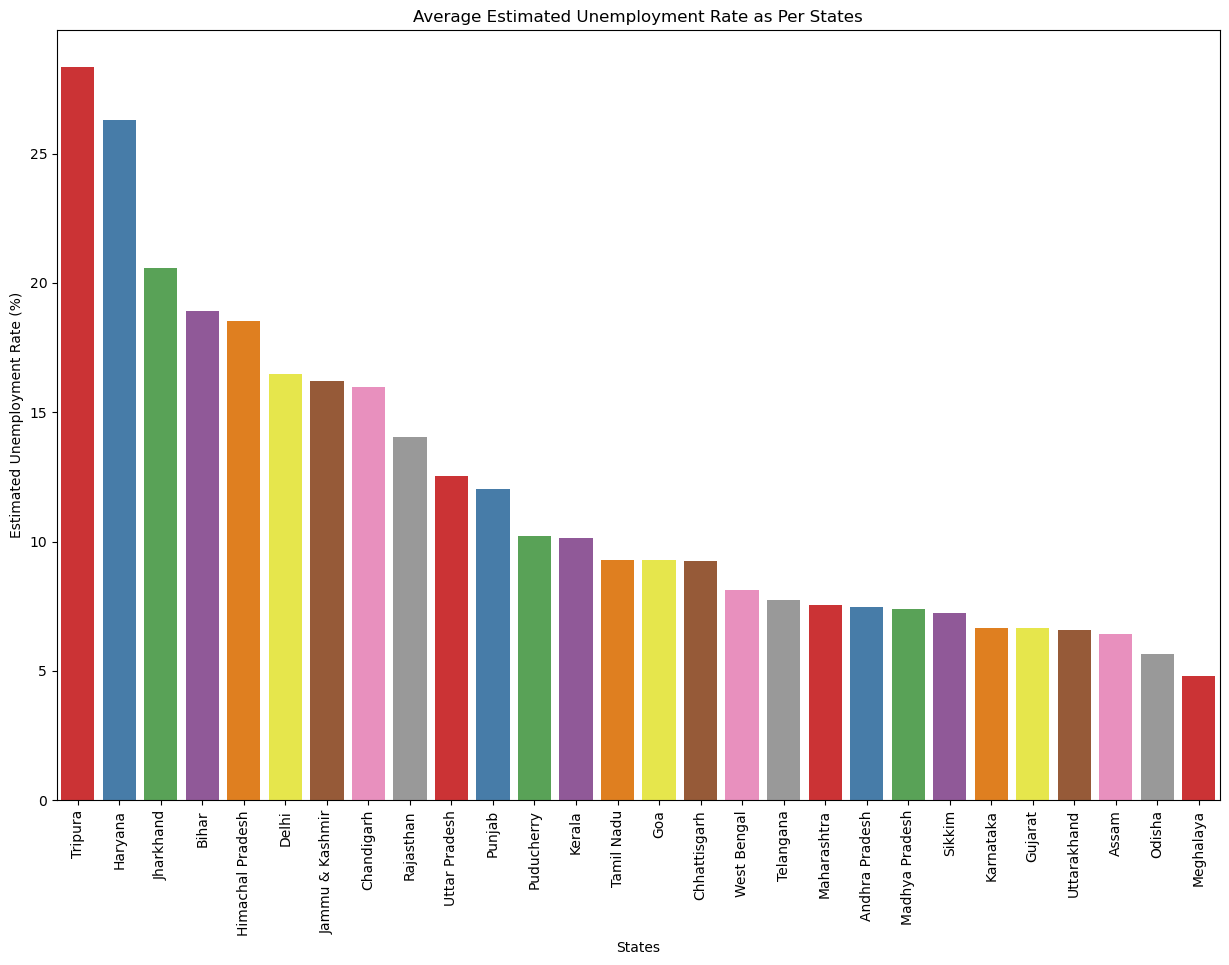

In [34]:
plt.figure(figsize=(15,10))
plt.title("Average Estimated Unemployment Rate as Per States")
sns.barplot(x=X.index,y=X['Estimated Unemployment Rate (%)'],palette='Set1',data=X)
plt.xticks(rotation=90);

Insights

We can clearly observe that Tripura is having the Highest Average Unemplyment Rate followed by Haryana.

Meghalaya state is having the lowest Average Unemplyment Rate followed by Odisha.

In [35]:
# Average unemployement rate in each Area:

x=df.groupby(['Area'])['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).to_frame()
x

,Estimated Unemployment Rate (%)
Area,
Urban,13.166614
Rural,10.324791


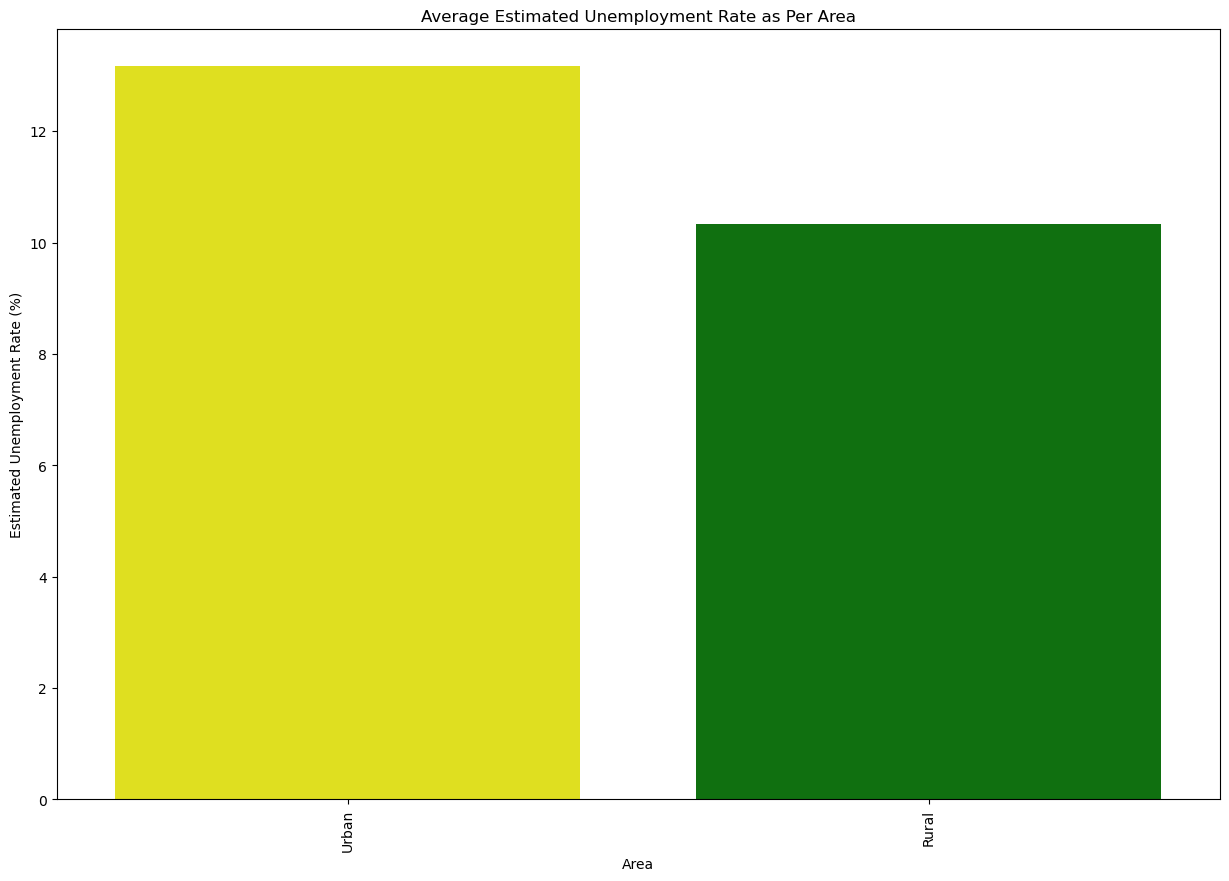

In [36]:

plt.figure(figsize=(15,10))
plt.title("Average Estimated Unemployment Rate as Per Area")
sns.barplot(x=x.index,y=x['Estimated Unemployment Rate (%)'],palette=['Yellow','Green'],data=X)
plt.xticks(rotation=90);

Insights

Urban Area is having more Unemployment Rate than Rural area

In [37]:
# Average Estimated Labour Participation Rate 

x=df.groupby(['States'])['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).to_frame()
x

,Estimated Labour Participation Rate (%)
States,
Tripura,61.823929
Meghalaya,57.080741
Telangana,53.002500
Gujarat,46.101071
Sikkim,46.070000
West Bengal,45.417500
Assam,44.868462
Himachal Pradesh,44.222143
Chhattisgarh,42.810714


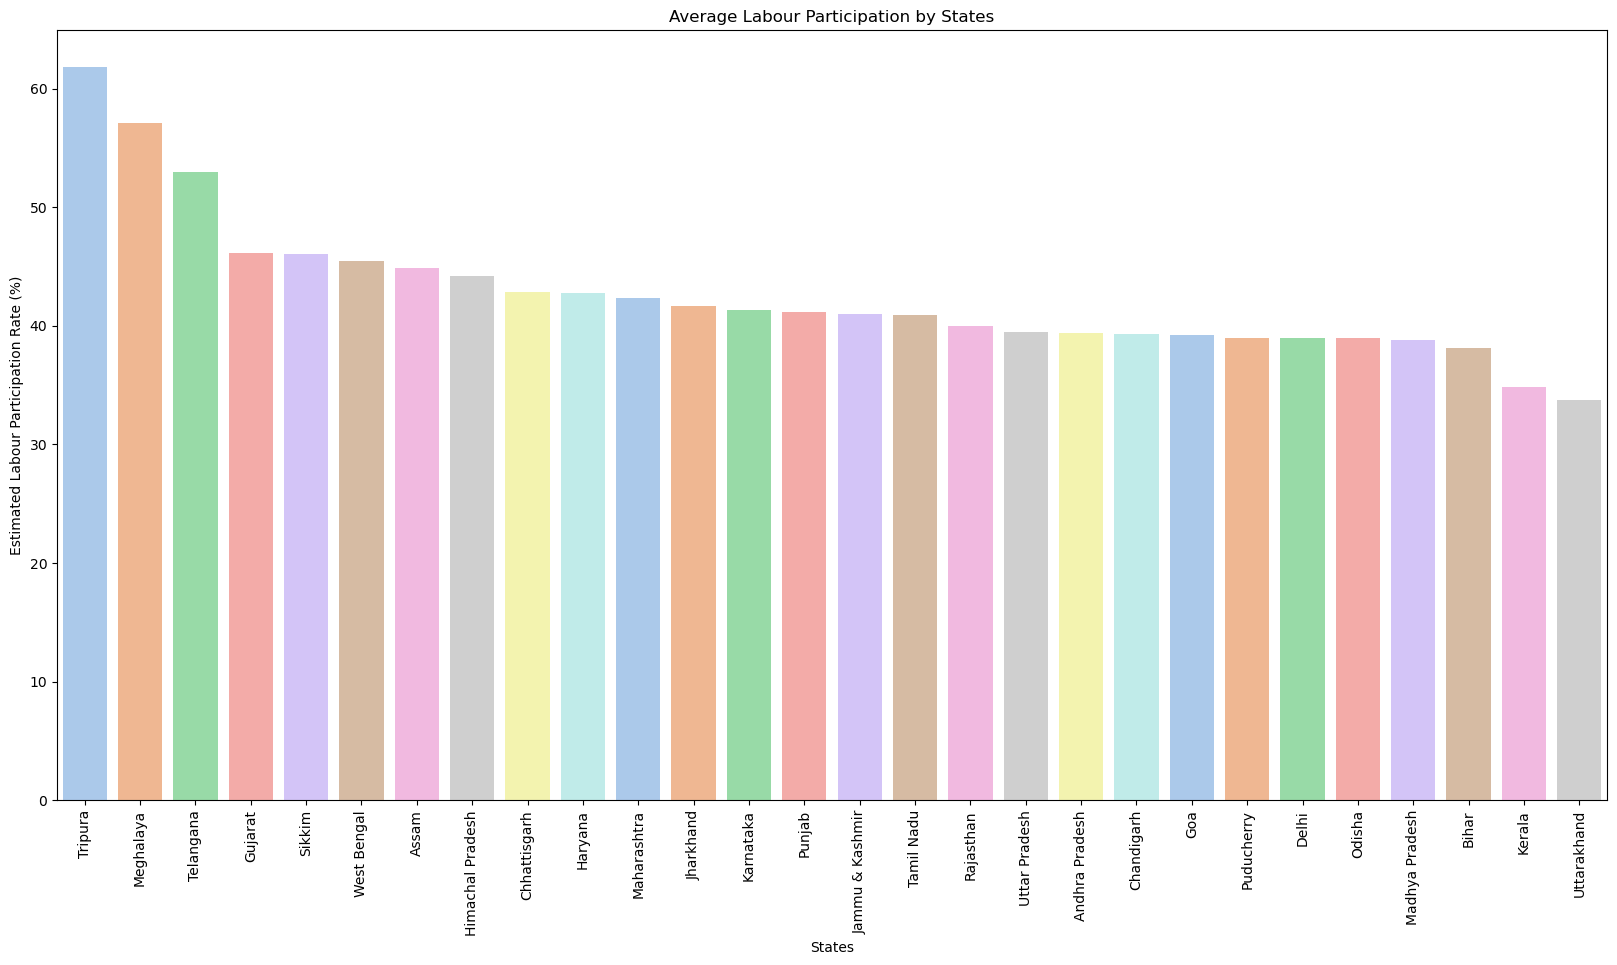

In [40]:
plt.figure(figsize=(20,10))
plt.title("Average Labour Participation by States")
sns.barplot(x=x.index, y=x['Estimated Labour Participation Rate (%)'], palette='pastel')
plt.xticks(rotation=90)
plt.show()


Insights

We can clearly observe that Tripura is having the Highest Average Laobour Participation Rate followed by Haryana.

Uttrakhand state is having the lowest Average Unemplyment Rate followed by Kerala.

In [41]:
# Average Estimated Labour Participation Rate as per area

x=df.groupby(['Area'])['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).to_frame()
x

,Estimated Labour Participation Rate (%)
Area,
Rural,44.464819
Urban,40.901365


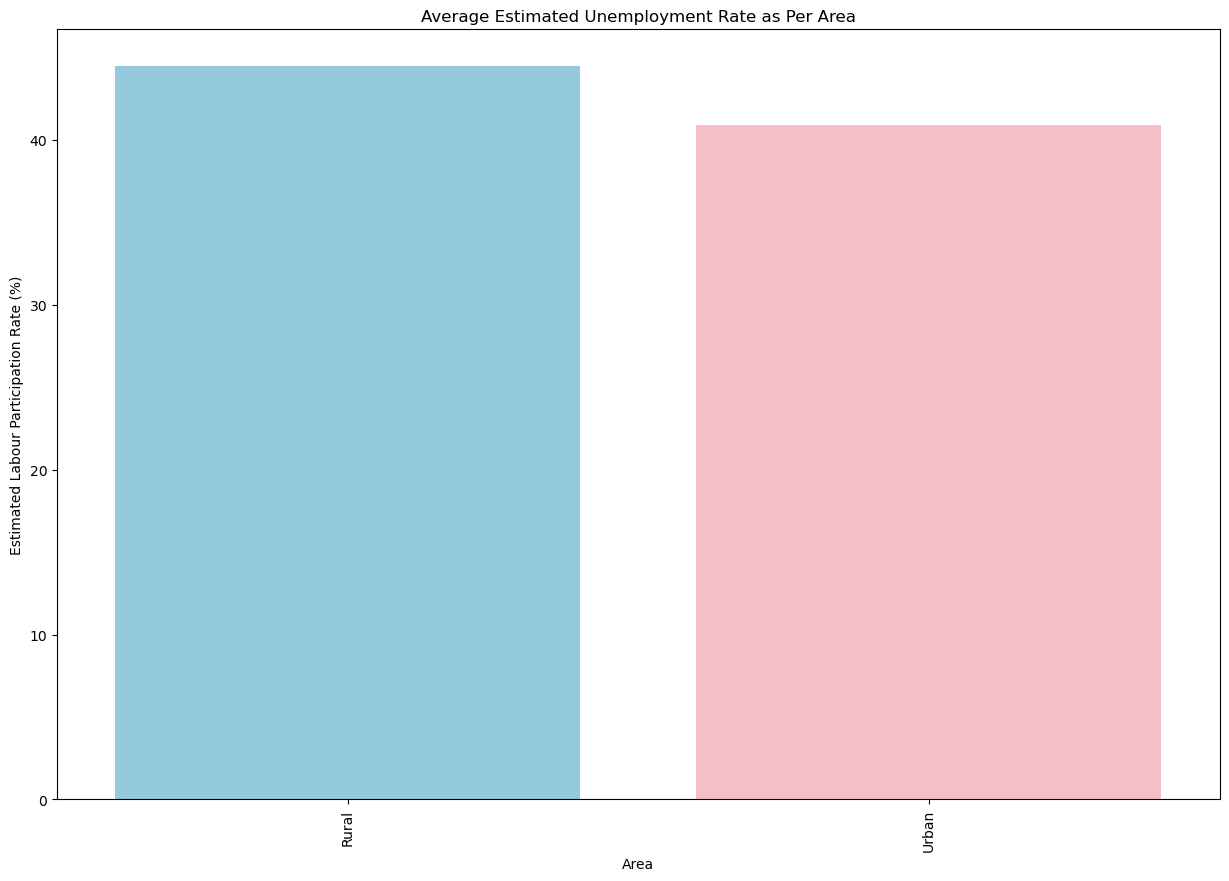

In [42]:
plt.figure(figsize=(15,10))
plt.title("Average Estimated Unemployment Rate as Per Area")
sns.barplot(x=x.index, y=x['Estimated Labour Participation Rate (%)'], palette=['skyblue','lightpink'])
plt.xticks(rotation=90)
plt.show()


Insights

Urban Area is having more Unemployment Rate even though of low labour rate when compared with Rural Area

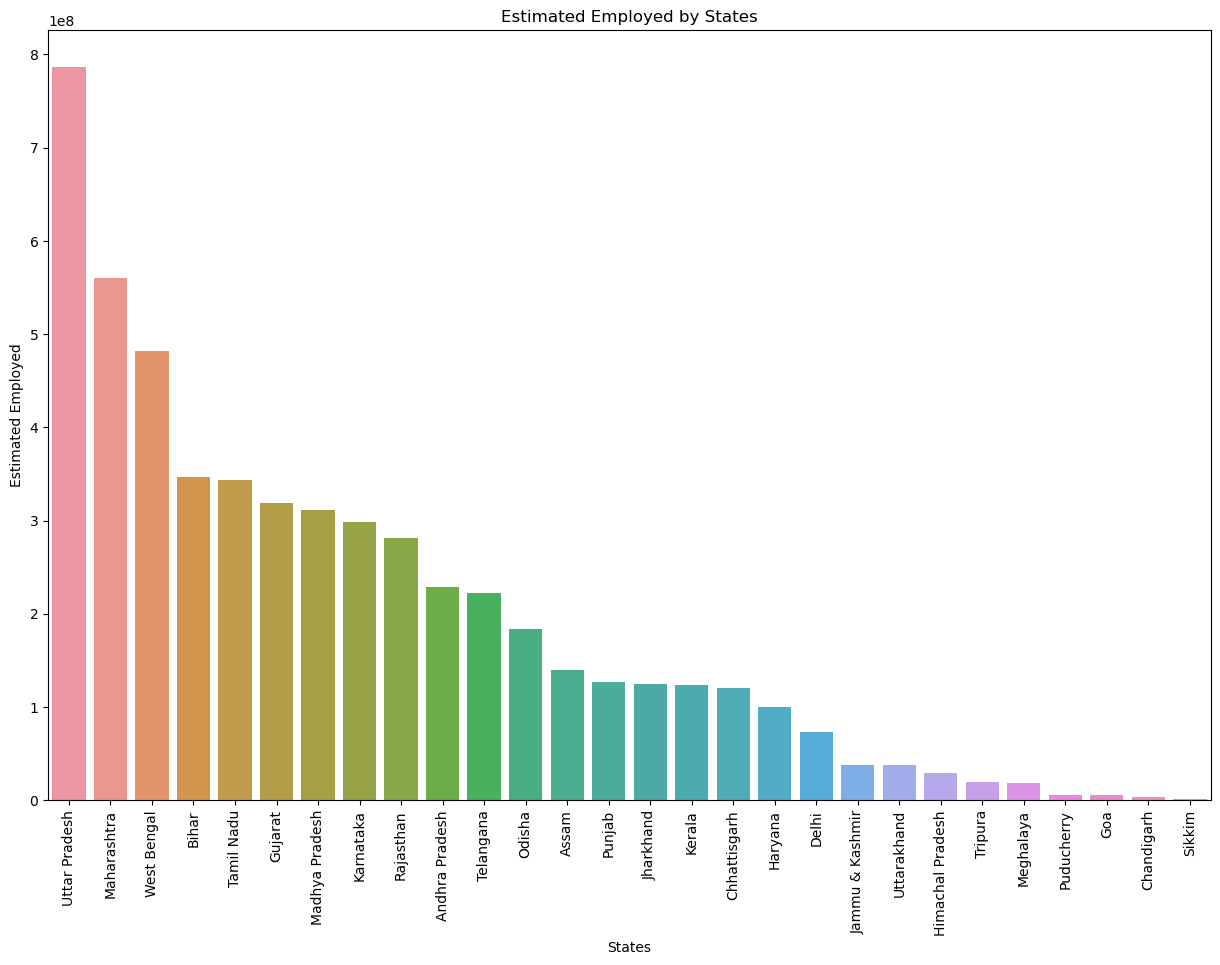

In [54]:
plt.figure(figsize=(15,10))
plt.title("Estimated Employed by States")
sns.barplot(x=x.index, y=x['Estimated Employed'], data=x)
plt.xticks(rotation=90)
plt.show()

Insights

We can clearly observe that Uttar Pradesh is having the Highest emplyment followed by Maharastra.

Sikkim state is having the lowest emplyoment followed by Chandigarh.

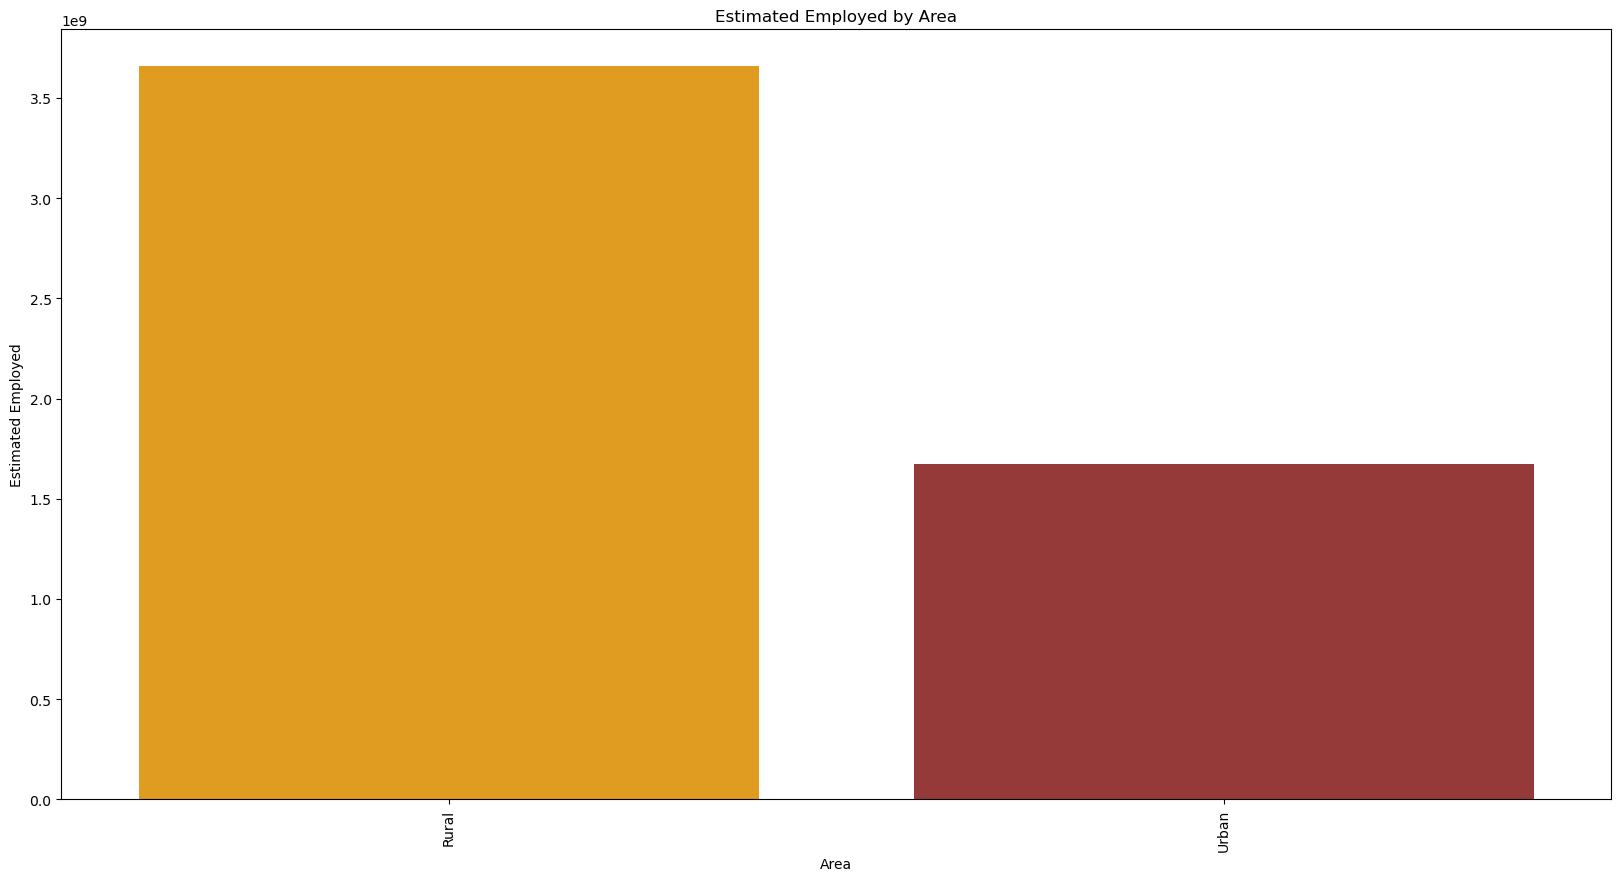

In [56]:
# Estimated employed as per area
plt.figure(figsize=(20,10))
plt.title("Estimated Employed by Area")
sns.barplot(x=x.index, y=x['Estimated Employed'], data=x, palette=['Orange', 'Brown'])
plt.xticks(rotation=90)
plt.show()


Insights

Rural Area is having more estimeated employment.

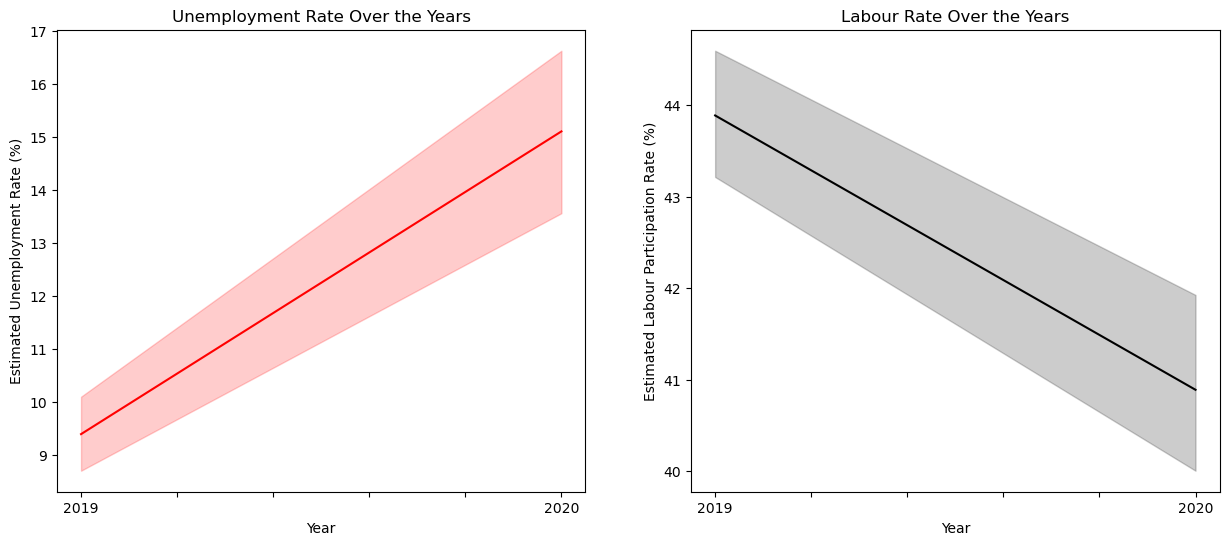

In [60]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.lineplot(x='Year', y='Estimated Unemployment Rate (%)', color='red', data=df)
ax.set_xticklabels(['','2019','','','','','2020'])
plt.title('Unemployment Rate Over the Years')

plt.subplot(1,2,2)
ax = sns.lineplot(x='Year', y='Estimated Labour Participation Rate (%)', color='black', data=df)
ax.set_xticklabels(['','2019','','','','','2020'])
plt.title('Labour Rate Over the Years')

plt.show()


# Observations

From first plot we can clearly observe that there was a Hige increment in Unemployment over the years.

From second plot we can clarly observe that there was a Huge decrement in Labour Rate over the years

Insights

So we can make an insight that the Unemployment rate has increased to double from 2019 to 2020. And the Labour Rate decreased drastically from 2019 to 2020

In [61]:
x=df[df['Year']==2019]
y=df[df['Year']==2020]

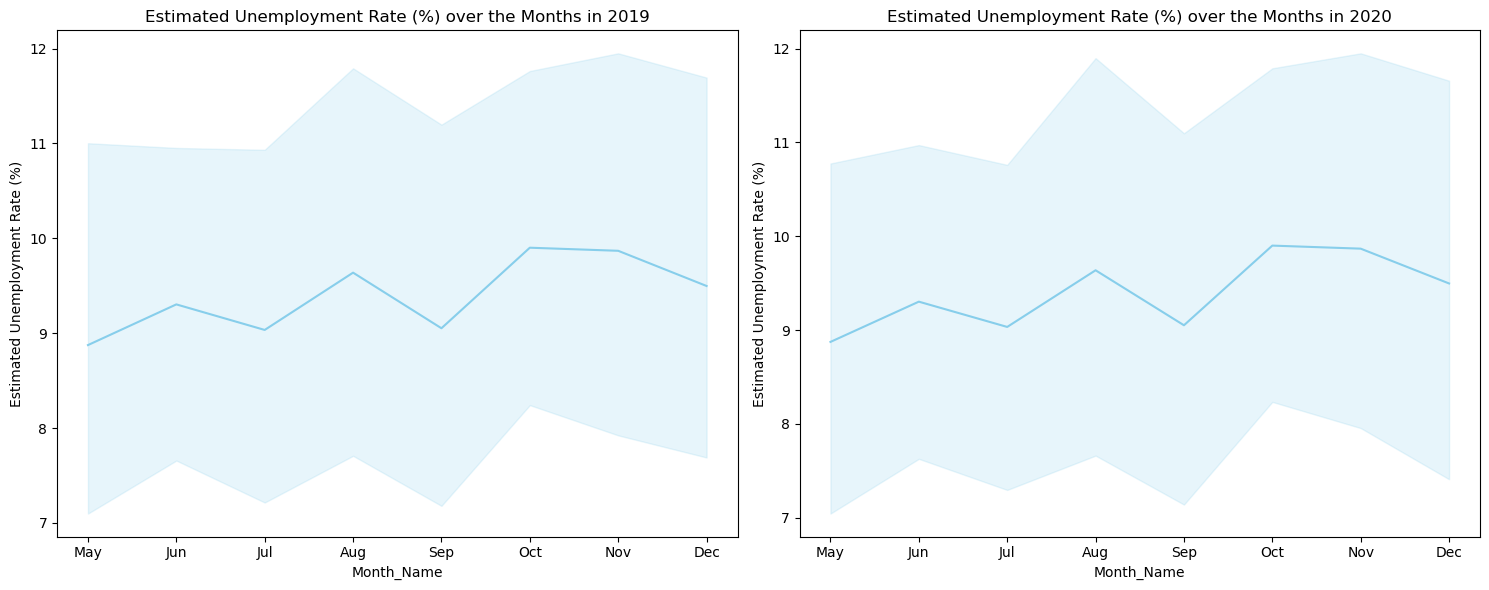

In [62]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Estimated Unemployment Rate (%) over the Months in 2019")
sns.lineplot(x='Month_Name', y='Estimated Unemployment Rate (%)', color='skyblue', data=x)

plt.subplot(1,2,2)
plt.title("Estimated Unemployment Rate (%) over the Months in 2020")
sns.lineplot(x='Month_Name', y='Estimated Unemployment Rate (%)', color='skyblue', data=x)

plt.tight_layout()
plt.show()


# Insights :
    
Estimated Unemployment Rate (%) over the Months in 2019 will be slightly increased during may to december

Estimated Unemployment Rate (%) over the Months in 2020 it will highly increased between march to june


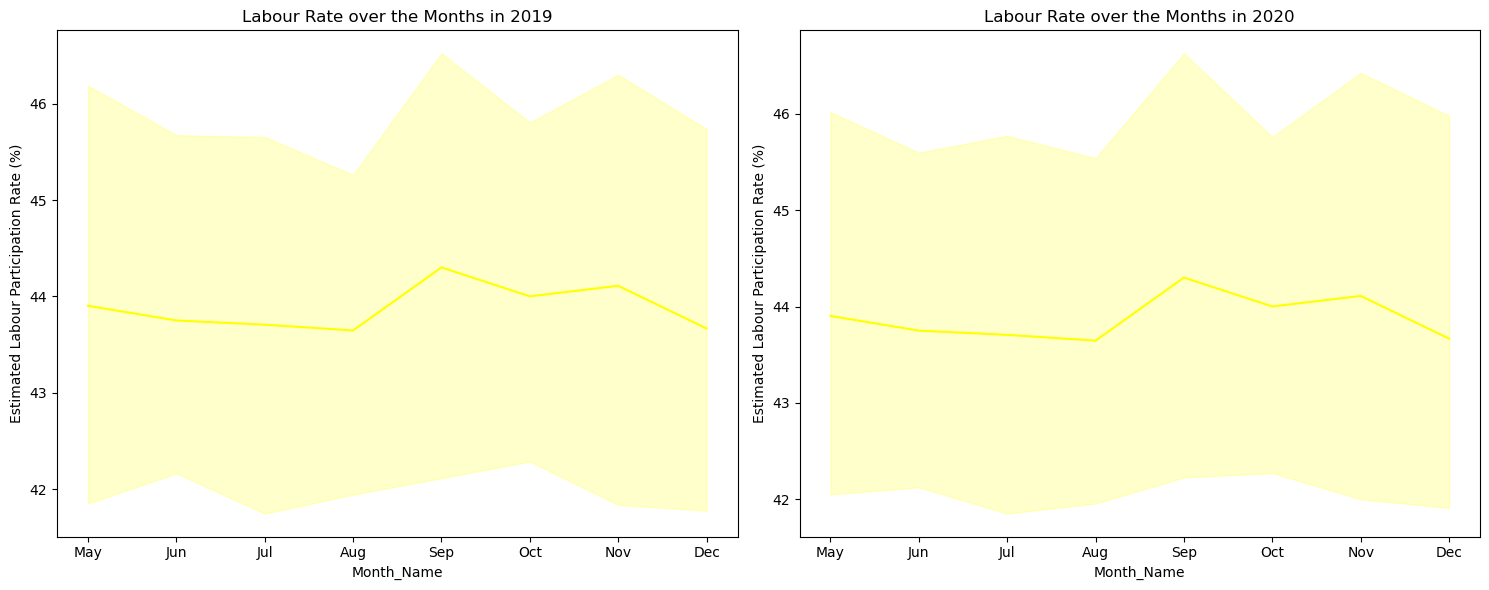

In [64]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Labour Rate over the Months in 2019")
sns.lineplot(x='Month_Name', y='Estimated Labour Participation Rate (%)', color='yellow', data=x)

plt.subplot(1,2,2)
plt.title("Labour Rate over the Months in 2020")
sns.lineplot(x='Month_Name', y='Estimated Labour Participation Rate (%)', color='yellow', data=x)

plt.tight_layout()
plt.show()


Insights :
    
Estimated Labour Participation Rate (%) over the Months in 2019 will be slightly increased during may to december

Estimated Labour Participation Rate (%) over the Months in 2020 it will highly decreased between januaray to april

# So the data is from covid 19 period 

# Impact of COVID-19 in Unemployment Rate in India

Visualizing States Wise Increment in Unemployment Rate During the Lockdown.

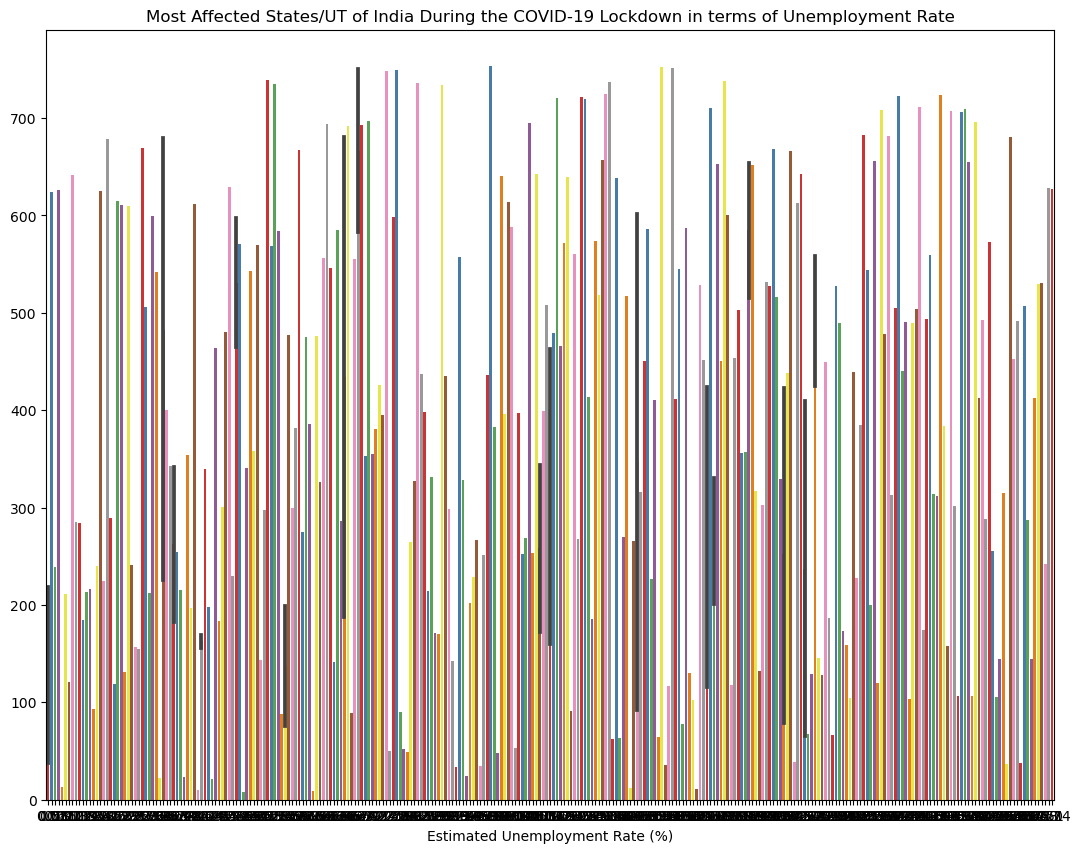

In [65]:
plt.figure(figsize=(13,10))
sns.barplot(x="Estimated Unemployment Rate (%)", y=y.index, palette="Set1", data=y)
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Unemployment Rate")
plt.show()


Insights

Top 5 most affected states during the COVID-19 Lockdown in terms of Unemployment Rate are:-

Puducherry

Jharkhand

Haryana

Bihar

Tripura

Visualizing States Wise Increment in Labour Rate During the Lockdown.

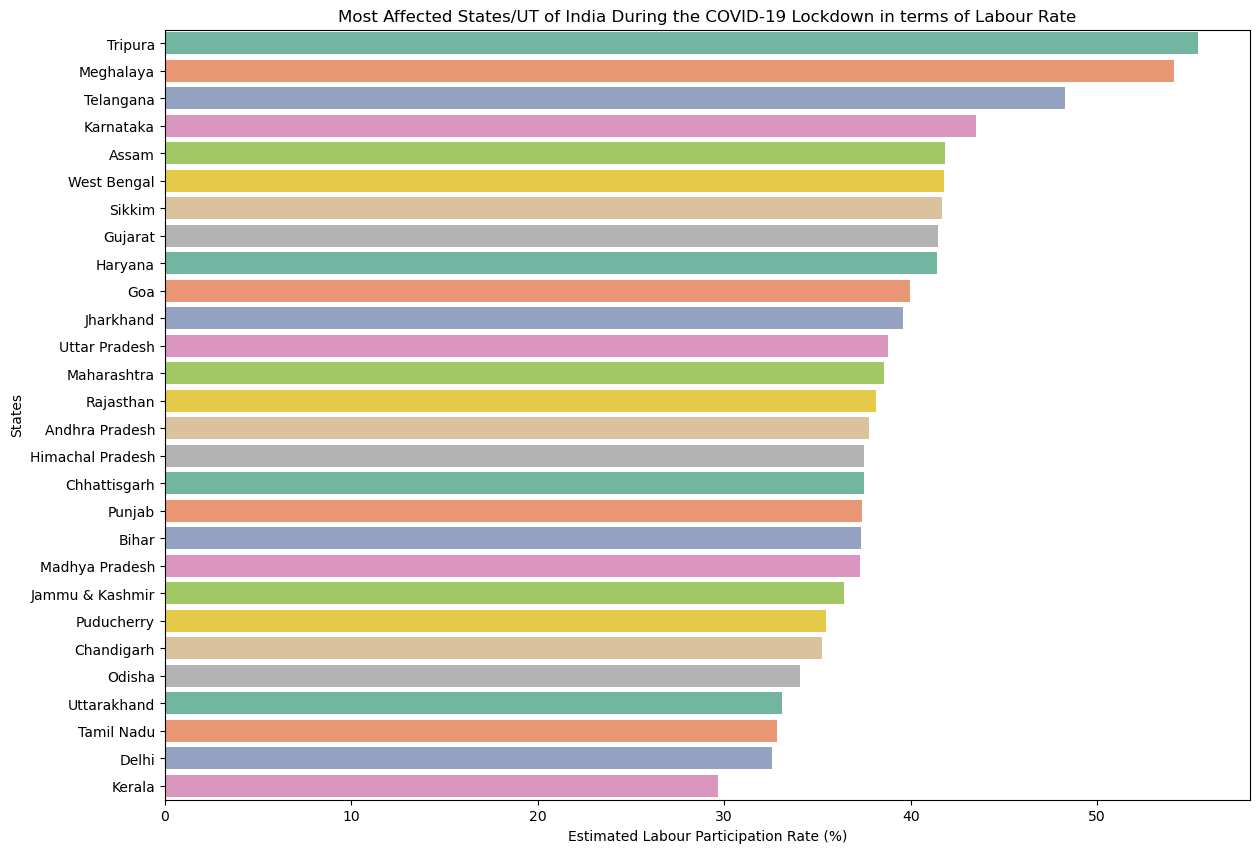

In [67]:
plt.figure(figsize=(14,10))
sns.barplot(x="Estimated Labour Participation Rate (%)", y=y.index, palette="Set2", data=y)
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Labour Rate")
plt.show()


Insights

Top 5 most affected states/UT during the COVID-19 Lockdown in terms of Labour Rate are:- Tripura

Meghalaya

Telangana

Karnatak

Assam